In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv('oct_march.csv')
df.head()

,chid,views,subscriber,videoscount,date
0,UC6ROKPXrnzfhNYST1w,3302429,2087,4,2016-10-01
1,UC6ROKPXrnzfhNYST1w,3304705,2087,4,2016-10-02
2,UC6ROKPXrnzfhNYST1w,3306526,2090,4,2016-10-03
3,UC6ROKPXrnzfhNYST1w,3309092,2090,4,2016-10-04
4,UC6ROKPXrnzfhNYST1w,3311343,2090,4,2016-10-05


In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('oct_march.csv', parse_dates=['date'], index_col='date',date_parser=dateparse)
print data.head()


                           chid    views  subscriber  videoscount
date                                                             
2016-10-01  UC6ROKPXrnzfhNYST1w  3302429        2087            4
2016-10-02  UC6ROKPXrnzfhNYST1w  3304705        2087            4
2016-10-03  UC6ROKPXrnzfhNYST1w  3306526        2090            4
2016-10-04  UC6ROKPXrnzfhNYST1w  3309092        2090            4
2016-10-05  UC6ROKPXrnzfhNYST1w  3311343        2090            4


In [4]:
data['chid'].value_counts()

UC6M1fGj_FokrrgqRuw    182
UC685tbaDLsOlfBVzfA    182
UC6R1DFp6TbjLRaBDNA    182
UC6aooX-l3XaEnAcujw    182
UC6x3l2wEUqBbUXmgKg    182
UC6KlaVksIZ180wq70g    182
UC6IsogHvcPITLjkqSQ    182
UC6u_I_vSuBPlVj_L3Q    182
UC6AbGQJtsLAjcGNs9w    182
UC6rXzoU-_RQn3tK_zw    182
UC6N5nZgC-o13ydQ5zA    182
UC6BJlqI4WKE_x1kjDw    182
UC6zmKdHGKMTBxHG6Hg    182
UC60GHVk_6ddgqhHwcg    182
UC6vXpfjOGKG88G9gRQ    182
UC6TQheKNWfxenvqeAQ    182
UC6JTYOqAl0rX4UE0zA    182
UC6mBEOY5tc42-7RRXA    182
UC6sm5R3f_sFkQ9ujmw    182
UC6lg1TT-CG93KH3ZWg    182
UC6iYzKmOJO0Cs-WfCw    182
UC6_aLZwre0yxXvhwNw    182
UC6WH_14n319Ef-FerA    182
UC6pEFHFpp_lXZ1LUGQ    182
UC6tJsYi0KhHQS089oA    182
UC6aX2KGdHrAVrNj6pA    182
UC66EUC6JjLZrg         182
UC6WX3lZAhSFfwGwBUQ    182
UC6ROKPXrnzfhNYST1w    182
UC6JwCF-UwTQOSq-sZw    182
                      ... 
UC6_-ciW9RQcEMA_iBA    182
UC6wEnFGqbj3bK485EA    182
UC6l6BYM7k31gN9V0cw    182
UC6sjyZNr6kG3WW8CTA    182
UC6flofJskgS3FUpTNQ    182
UC6iKqbsg50ncxWAYgA    182
U

In [5]:
#CHOSE the following Channel with ID:UC6ROKPXrnzfhNYST1w
channel = data[data.chid=='UC6ROKPXrnzfhNYST1w']
channel.drop('chid',axis=1,inplace=True)
len(channel)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


182

In [55]:
channel.tail()

,views,subscriber,videoscount
date,,,
2017-03-27,3850032,2369,5
2017-03-28,3856527,2373,5
2017-03-29,3863729,2370,5
2017-03-30,3870341,2378,5
2017-03-31,3877914,2386,5


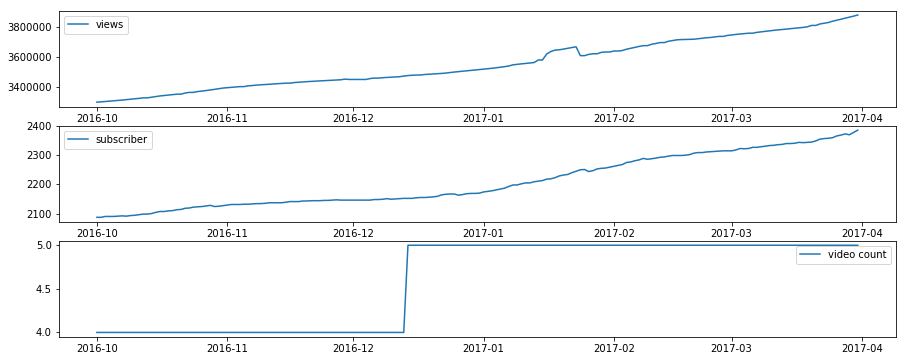

In [147]:
plt.subplot(311)
plt.plot(channel['views'], label='views')
plt.legend(loc='best')

plt.subplot(312)
plt.plot(channel['subscriber'], label='subscriber')
plt.legend(loc='best')

plt.subplot(313)
plt.plot(channel['videoscount'], label='video count')
plt.legend(loc='best')

In [8]:
tsv = channel['views']
tss = channel['subscriber']
tsvc = channel['videoscount']

In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=30)
    rolstd = pd.rolling_std(timeseries, window=30)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [148]:
#Now we will test for stationarity 

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()


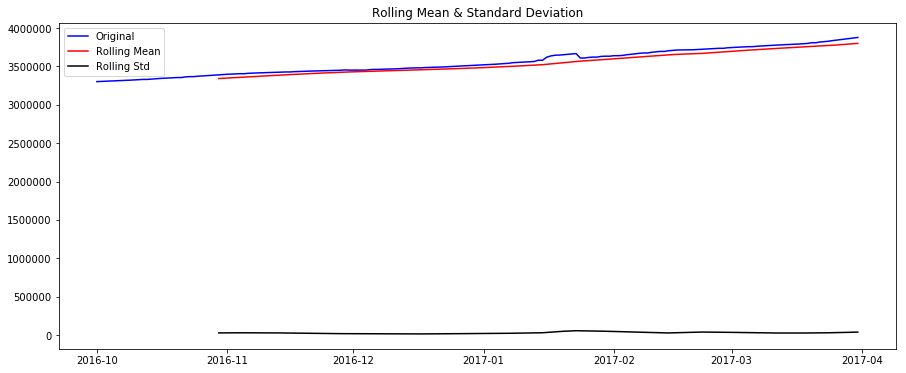

Results of Dickey-Fuller Test:
Test Statistic                   1.208981
p-value                          0.996047
#Lags Used                       9.000000
Number of Observations Used    172.000000
Critical Value (5%)             -2.878495
Critical Value (1%)             -3.468952
Critical Value (10%)            -2.575809
dtype: float64


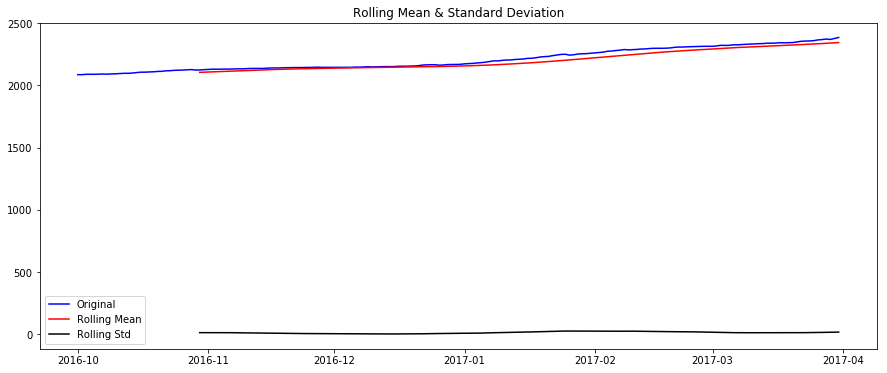

Results of Dickey-Fuller Test:
Test Statistic                   1.546707
p-value                          0.997689
#Lags Used                       6.000000
Number of Observations Used    175.000000
Critical Value (5%)             -2.878202
Critical Value (1%)             -3.468280
Critical Value (10%)            -2.575653
dtype: float64


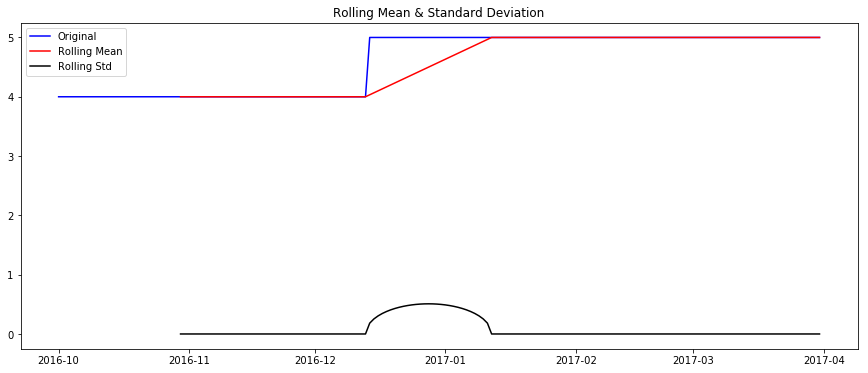

Results of Dickey-Fuller Test:
Test Statistic                  -1.203976
p-value                          0.671883
#Lags Used                       0.000000
Number of Observations Used    181.000000
Critical Value (5%)             -2.877644
Critical Value (1%)             -3.467005
Critical Value (10%)            -2.575355
dtype: float64


In [11]:
test_stationarity(tsv)
test_stationarity(tss)
test_stationarity(tsvc)

In [12]:
tsv_log = np.log(tsv)
moving_avg = pd.rolling_mean(tsv_log,30)
tsv_moving_avg_diff = tsv_log - moving_avg
tsv_moving_avg_diff.head(32)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  from ipykernel import kernelapp as app


date
2016-10-01         NaN
2016-10-02         NaN
2016-10-03         NaN
2016-10-04         NaN
2016-10-05         NaN
2016-10-06         NaN
2016-10-07         NaN
2016-10-08         NaN
2016-10-09         NaN
2016-10-10         NaN
2016-10-11         NaN
2016-10-12         NaN
2016-10-13         NaN
2016-10-14         NaN
2016-10-15         NaN
2016-10-16         NaN
2016-10-17         NaN
2016-10-18         NaN
2016-10-19         NaN
2016-10-20         NaN
2016-10-21         NaN
2016-10-22         NaN
2016-10-23         NaN
2016-10-24         NaN
2016-10-25         NaN
2016-10-26         NaN
2016-10-27         NaN
2016-10-28         NaN
2016-10-29         NaN
2016-10-30    0.014566
2016-10-31    0.014834
2016-11-01    0.014569
Name: views, dtype: float64

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()


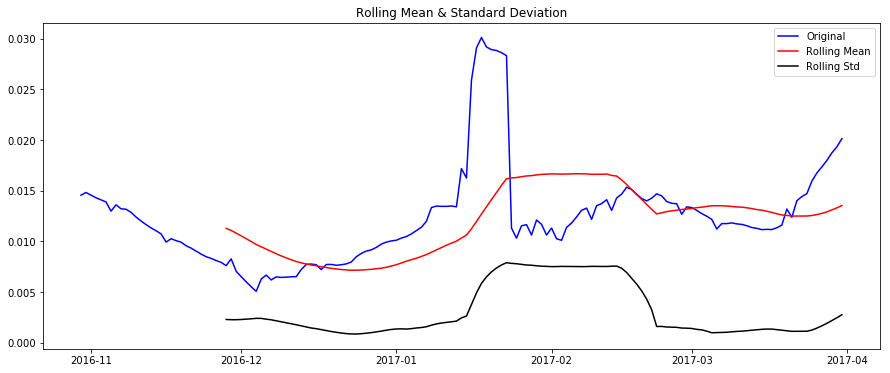

Results of Dickey-Fuller Test:
Test Statistic                  -2.245856
p-value                          0.190025
#Lags Used                       9.000000
Number of Observations Used    143.000000
Critical Value (5%)             -2.881973
Critical Value (1%)             -3.476927
Critical Value (10%)            -2.577665
dtype: float64


In [13]:
tsv_moving_avg_diff.dropna(inplace=True)
test_stationarity(tsv_moving_avg_diff)

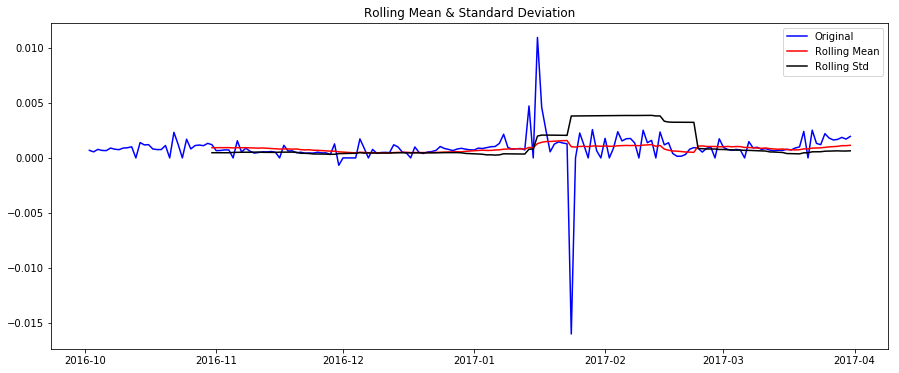

Results of Dickey-Fuller Test:
Test Statistic                  -4.714999
p-value                          0.000079
#Lags Used                       8.000000
Number of Observations Used    172.000000
Critical Value (5%)             -2.878495
Critical Value (1%)             -3.468952
Critical Value (10%)            -2.575809
dtype: float64


In [27]:
tsv_log_diff = tsv_log - tsv_log.shift()
tsv_log_diff.dropna(inplace=True)
test_stationarity(tsv_log_diff)

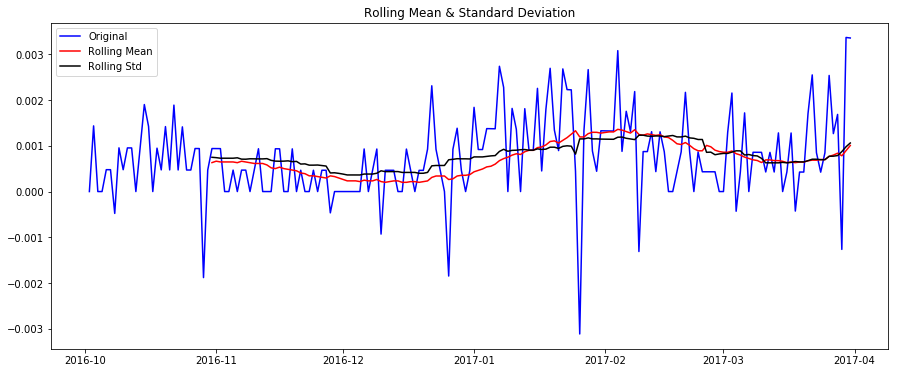

Results of Dickey-Fuller Test:
Test Statistic                  -2.484525
p-value                          0.119285
#Lags Used                       7.000000
Number of Observations Used    173.000000
Critical Value (5%)             -2.878396
Critical Value (1%)             -3.468726
Critical Value (10%)            -2.575756
dtype: float64


In [102]:
tss_log = np.log(tss)
tss_log_diff = tss_log - tss_log.shift(1) 
tss_log_diff.dropna(inplace=True)
test_stationarity(tss_log_diff)


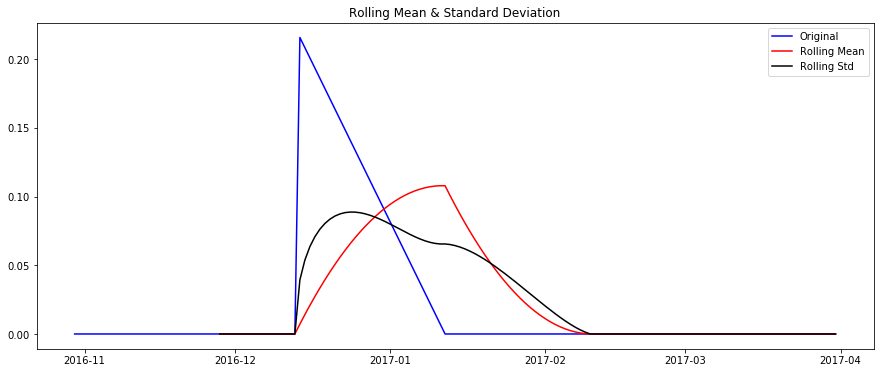

Results of Dickey-Fuller Test:
Test Statistic                  -2.144730
p-value                          0.226913
#Lags Used                       0.000000
Number of Observations Used    152.000000
Critical Value (5%)             -2.880750
Critical Value (1%)             -3.474121
Critical Value (10%)            -2.577013
dtype: float64


In [103]:
tsvc_log = np.log(tsvc)
moving_avg = pd.rolling_mean(tsvc_log,30)
tsvc_moving_avg_diff = tsvc_log - moving_avg
tsvc_moving_avg_diff.dropna(inplace=True)
test_stationarity(tsvc_moving_avg_diff)


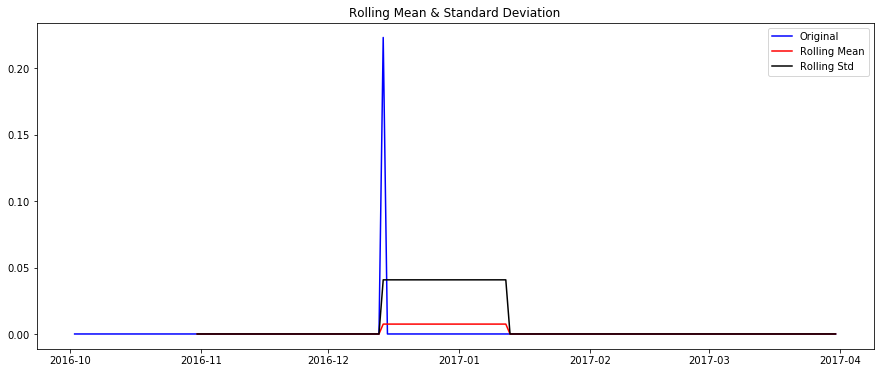

Results of Dickey-Fuller Test:
Test Statistic                -1.341641e+01
p-value                        4.273531e-25
#Lags Used                     0.000000e+00
Number of Observations Used    1.800000e+02
Critical Value (5%)           -2.877735e+00
Critical Value (1%)           -3.467211e+00
Critical Value (10%)          -2.575403e+00
dtype: float64


In [116]:
tsvc_log_diff = tsvc_log - tsvc_log.shift()
tsvc_log_diff.dropna(inplace=True)
test_stationarity(tsvc_log_diff)

In [19]:
#tsv_log_diff
#tsvc_log_diff
#tss_log_decompose


In [20]:
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.8f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.8f' % (best_cfg, best_score))

# load dataset

# evaluate parameters
p_values = [0, 1, 2]
d_values = [0,1]
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(tsv_log, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.00455400
ARIMA(0, 0, 1) MSE=0.00115835
ARIMA(0, 1, 0) MSE=0.00000058
ARIMA(0, 1, 1) MSE=0.00000058
ARIMA(1, 0, 0) MSE=0.00000179
ARIMA(1, 1, 0) MSE=0.00000058
ARIMA(1, 1, 1) MSE=0.00000056
ARIMA(2, 1, 0) MSE=0.00000056
ARIMA(2, 1, 1) MSE=0.00000056
Best ARIMA(2, 1, 1) MSE=0.00000056


In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

mod1 = SARIMAX(tsv_log, order=(2,1,1))
res1 = mod1.fit()

mod2 = SARIMAX(tsv_log, order=(2,1,1))
res2 = mod2.filter(res1.params)
pred_v = res2.forecast(91)


"\nmodel = ARIMA(tsv_log, order=(2, 1, 1))  \nresults_AR = model.fit(disp=-1)  \nplt.plot(tsv_log_diff)\nplt.plot(results_AR.fittedvalues, color='red')\nplt.title('RSS: %.4f'% sum((results_AR.fittedvalues-tsv_log_diff)**2))"

In [77]:
pred_v = np.exp(pred_v)


2017-04-01    3.882748e+06
2017-04-02    3.887167e+06
2017-04-03    3.891158e+06
2017-04-04    3.894765e+06
2017-04-05    3.898023e+06
2017-04-06    3.900966e+06
2017-04-07    3.903624e+06
2017-04-08    3.906025e+06
2017-04-09    3.908193e+06
2017-04-10    3.910151e+06
2017-04-11    3.911919e+06
2017-04-12    3.913516e+06
2017-04-13    3.914958e+06
2017-04-14    3.916259e+06
2017-04-15    3.917435e+06
2017-04-16    3.918496e+06
2017-04-17    3.919454e+06
2017-04-18    3.920319e+06
2017-04-19    3.921099e+06
2017-04-20    3.921804e+06
2017-04-21    3.922441e+06
2017-04-22    3.923015e+06
2017-04-23    3.923534e+06
2017-04-24    3.924002e+06
2017-04-25    3.924424e+06
2017-04-26    3.924806e+06
2017-04-27    3.925150e+06
2017-04-28    3.925461e+06
2017-04-29    3.925741e+06
2017-04-30    3.925995e+06
                  ...     
2017-06-01    3.928254e+06
2017-06-02    3.928262e+06
2017-06-03    3.928270e+06
2017-06-04    3.928277e+06
2017-06-05    3.928283e+06
2017-06-06    3.928289e+06
2

In [80]:
pred_v = np.round_(pred_v)

In [38]:
p_values = [0, 1, 2]
d_values = [0,1]
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(tsvc_log, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.01257136
ARIMA(0, 0, 1) MSE=0.00352631
ARIMA(0, 1, 0) MSE=0.00000233
ARIMA(0, 1, 1) MSE=0.00000236
ARIMA(1, 0, 0) MSE=0.00000244
ARIMA(1, 0, 1) MSE=0.00000247
ARIMA(1, 1, 0) MSE=0.00000236
ARIMA(2, 0, 0) MSE=0.00000247
ARIMA(2, 1, 0) MSE=0.00000240
Best ARIMA(0, 1, 0) MSE=0.00000233


In [127]:
mod1 = SARIMAX(tsvc_log, order=(1,1,0))
res1 = mod1.fit()

mod2 = SARIMAX(tsvc_log, order=(1,1,0))
res2 = mod2.filter(res1.params)
pred_vc = res2.forecast(91)

In [128]:
pred_vc = np.exp(pred_vc)

In [137]:
pred_vc = np.round_(pred_vc)
pred_vc

2017-04-01    5.0
2017-04-02    5.0
2017-04-03    5.0
2017-04-04    5.0
2017-04-05    5.0
2017-04-06    5.0
2017-04-07    5.0
2017-04-08    5.0
2017-04-09    5.0
2017-04-10    5.0
2017-04-11    5.0
2017-04-12    5.0
2017-04-13    5.0
2017-04-14    5.0
2017-04-15    5.0
2017-04-16    5.0
2017-04-17    5.0
2017-04-18    5.0
2017-04-19    5.0
2017-04-20    5.0
2017-04-21    5.0
2017-04-22    5.0
2017-04-23    5.0
2017-04-24    5.0
2017-04-25    5.0
2017-04-26    5.0
2017-04-27    5.0
2017-04-28    5.0
2017-04-29    5.0
2017-04-30    5.0
             ... 
2017-06-01    5.0
2017-06-02    5.0
2017-06-03    5.0
2017-06-04    5.0
2017-06-05    5.0
2017-06-06    5.0
2017-06-07    5.0
2017-06-08    5.0
2017-06-09    5.0
2017-06-10    5.0
2017-06-11    5.0
2017-06-12    5.0
2017-06-13    5.0
2017-06-14    5.0
2017-06-15    5.0
2017-06-16    5.0
2017-06-17    5.0
2017-06-18    5.0
2017-06-19    5.0
2017-06-20    5.0
2017-06-21    5.0
2017-06-22    5.0
2017-06-23    5.0
2017-06-24    5.0
2017-06-25

In [94]:
p_values = [0, 1, 2]
d_values = [0,1]
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(tss_log, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.00383182
ARIMA(0, 0, 1) MSE=0.00097196
ARIMA(0, 1, 0) MSE=0.00000092
ARIMA(0, 1, 1) MSE=0.00000095
ARIMA(1, 0, 0) MSE=0.00000172
ARIMA(1, 1, 0) MSE=0.00000094
ARIMA(1, 1, 1) MSE=0.00000097
ARIMA(2, 1, 0) MSE=0.00000095
ARIMA(2, 1, 1) MSE=0.00000098
Best ARIMA(0, 1, 0) MSE=0.00000092


In [96]:
mod1 = SARIMAX(tss_log, order=(1,1,0))
res1 = mod1.fit()

mod2 = SARIMAX(tss_log, order=(1,1,0))
res2 = mod2.filter(res1.params)
pred_s = res2.forecast(91)

In [104]:
pred_s = np.round_(np.exp(pred_s))

In [107]:
submission = pd.DataFrame()
chid = 'UC6ROKPXrnzfhNYST1w'
submission['chid'] = [chid] * 91

In [138]:
submission['views'] = pred_v.values.astype(int)
submission['subscriber'] = pred_s.values.astype(int)
submission['videoscount'] = pred_vc.values.astype(int)

In [139]:
submission.head()

,chid,views,subscriber,videoscount
0,UC6ROKPXrnzfhNYST1w,3882748,2390,5
1,UC6ROKPXrnzfhNYST1w,3887167,2392,5
2,UC6ROKPXrnzfhNYST1w,3891158,2393,5
3,UC6ROKPXrnzfhNYST1w,3894765,2394,5
4,UC6ROKPXrnzfhNYST1w,3898023,2394,5


In [142]:
submission['date']=pd.date_range(start='2017-04-01',end='2017-06-30',freq='D')

In [145]:
submission.head()

,chid,views,subscriber,videoscount,date
0,UC6ROKPXrnzfhNYST1w,3882748,2390,5,2017-04-01
1,UC6ROKPXrnzfhNYST1w,3887167,2392,5,2017-04-02
2,UC6ROKPXrnzfhNYST1w,3891158,2393,5,2017-04-03
3,UC6ROKPXrnzfhNYST1w,3894765,2394,5,2017-04-04
4,UC6ROKPXrnzfhNYST1w,3898023,2394,5,2017-04-05


In [146]:
submission.to_csv('channel_stats.csv',index=False)